The columns of file is
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
statistical anaylsis of numerical features in data frame
                 id       host_id  neighbourhood_group     latitude  \
count  7.608000e+03  7.608000e+03                  0.0  7608.000000   
mean   2.328487e+17  1.032177e+08                  NaN    52.366725   
std    3.489604e+17  1.393419e+08                  NaN     0.017068   
min    2.818000e+03  3.159000e+03                  NaN    52.290340   
25%    1.696009e+07  9.937172e+06                  NaN    52.355890   
50%    3.822749e+07  3.501297e+07                  NaN    52.365980   
75%    6.525168e+17  1.402245e+08                  NaN    52.376470   
max 

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11612\2357295476.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],ax = axes[0])
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11612\2357295476.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'],ax = axes[1])
C:\Us

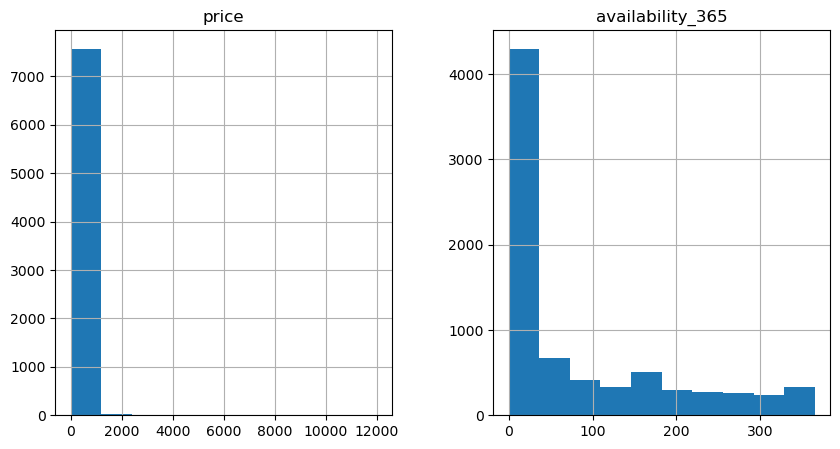

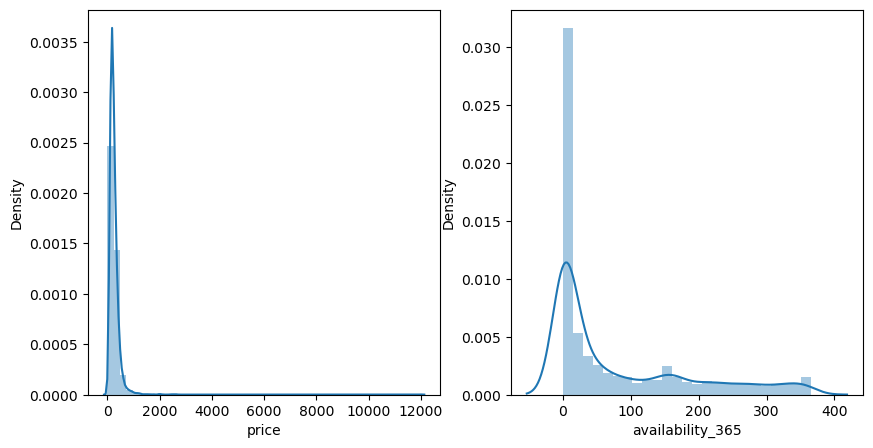

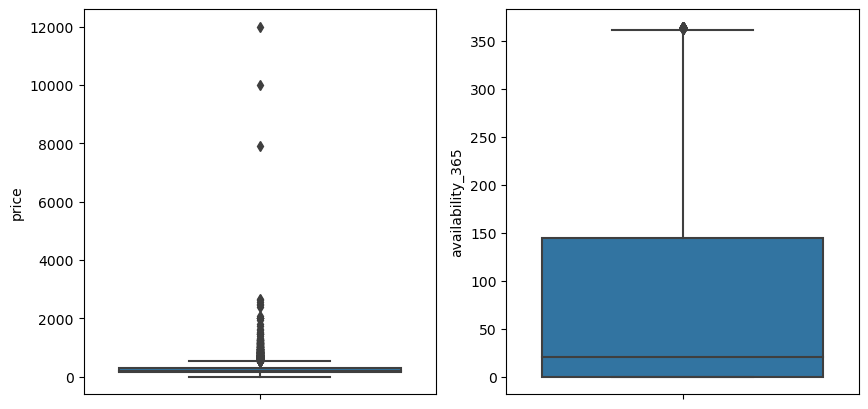

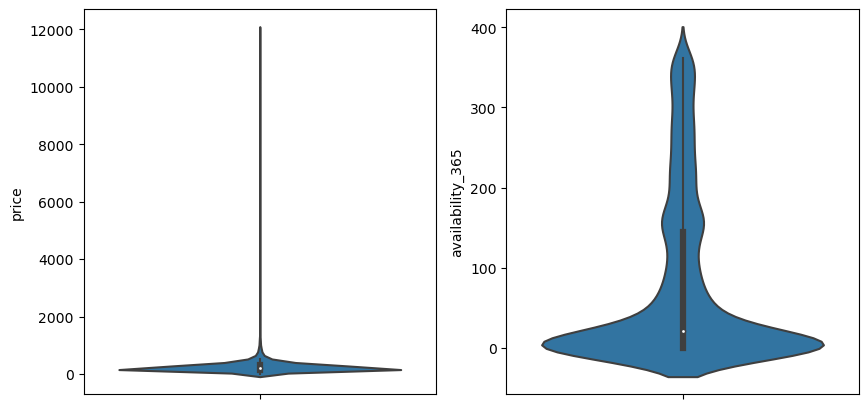

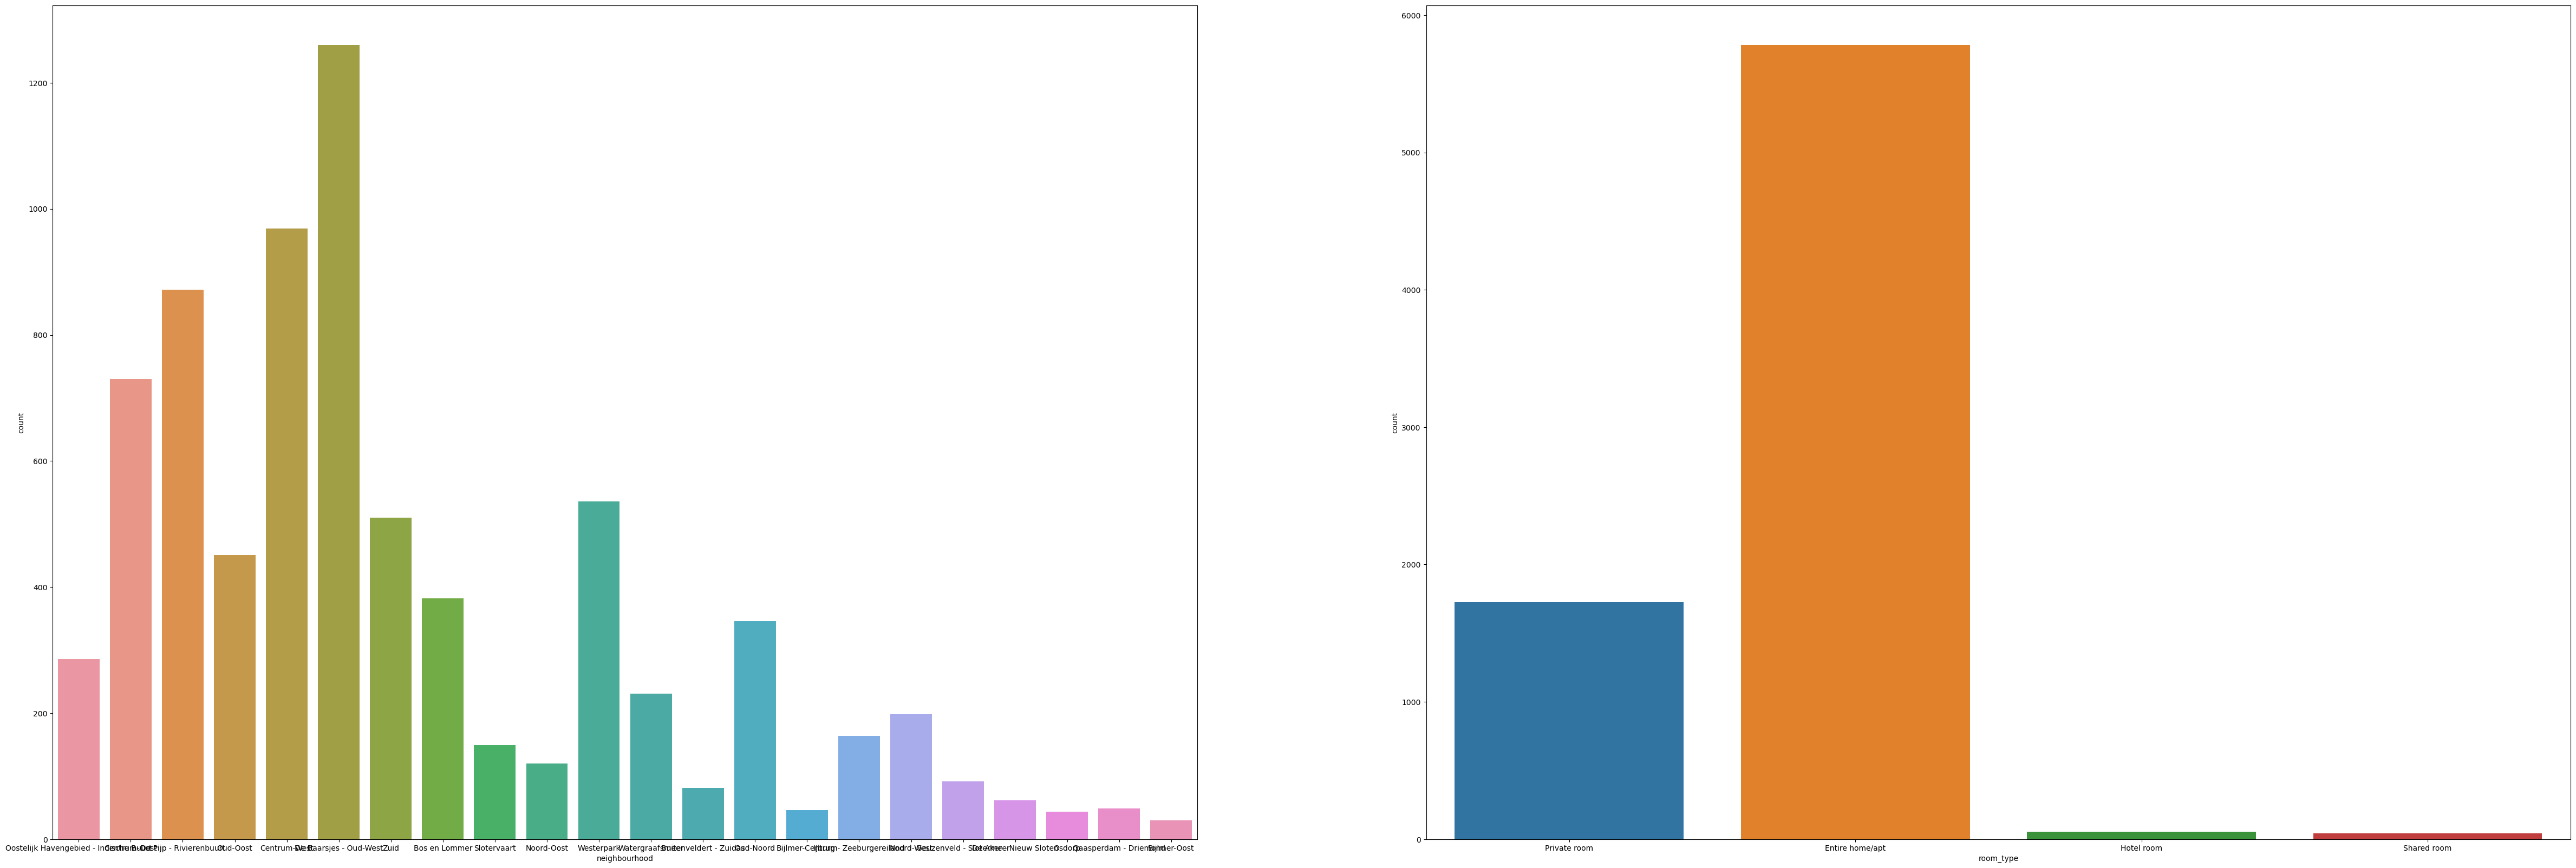

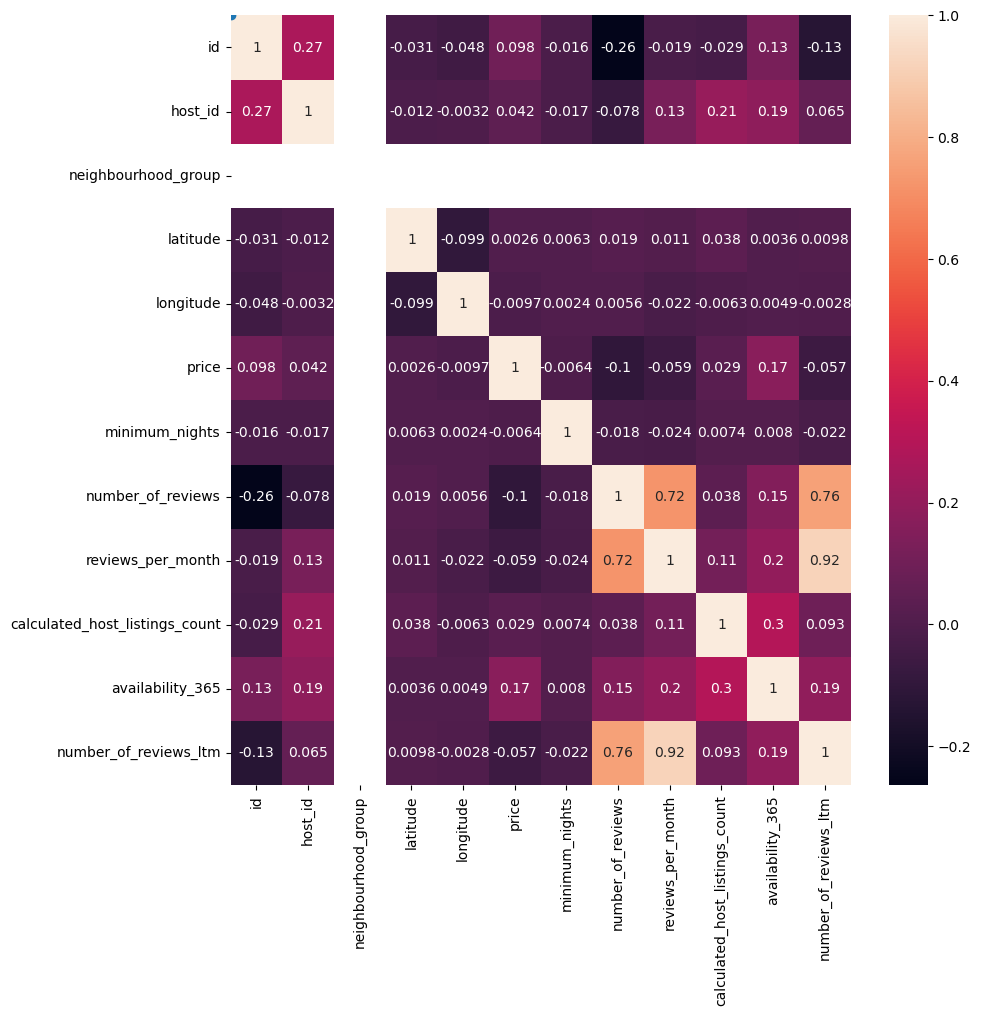

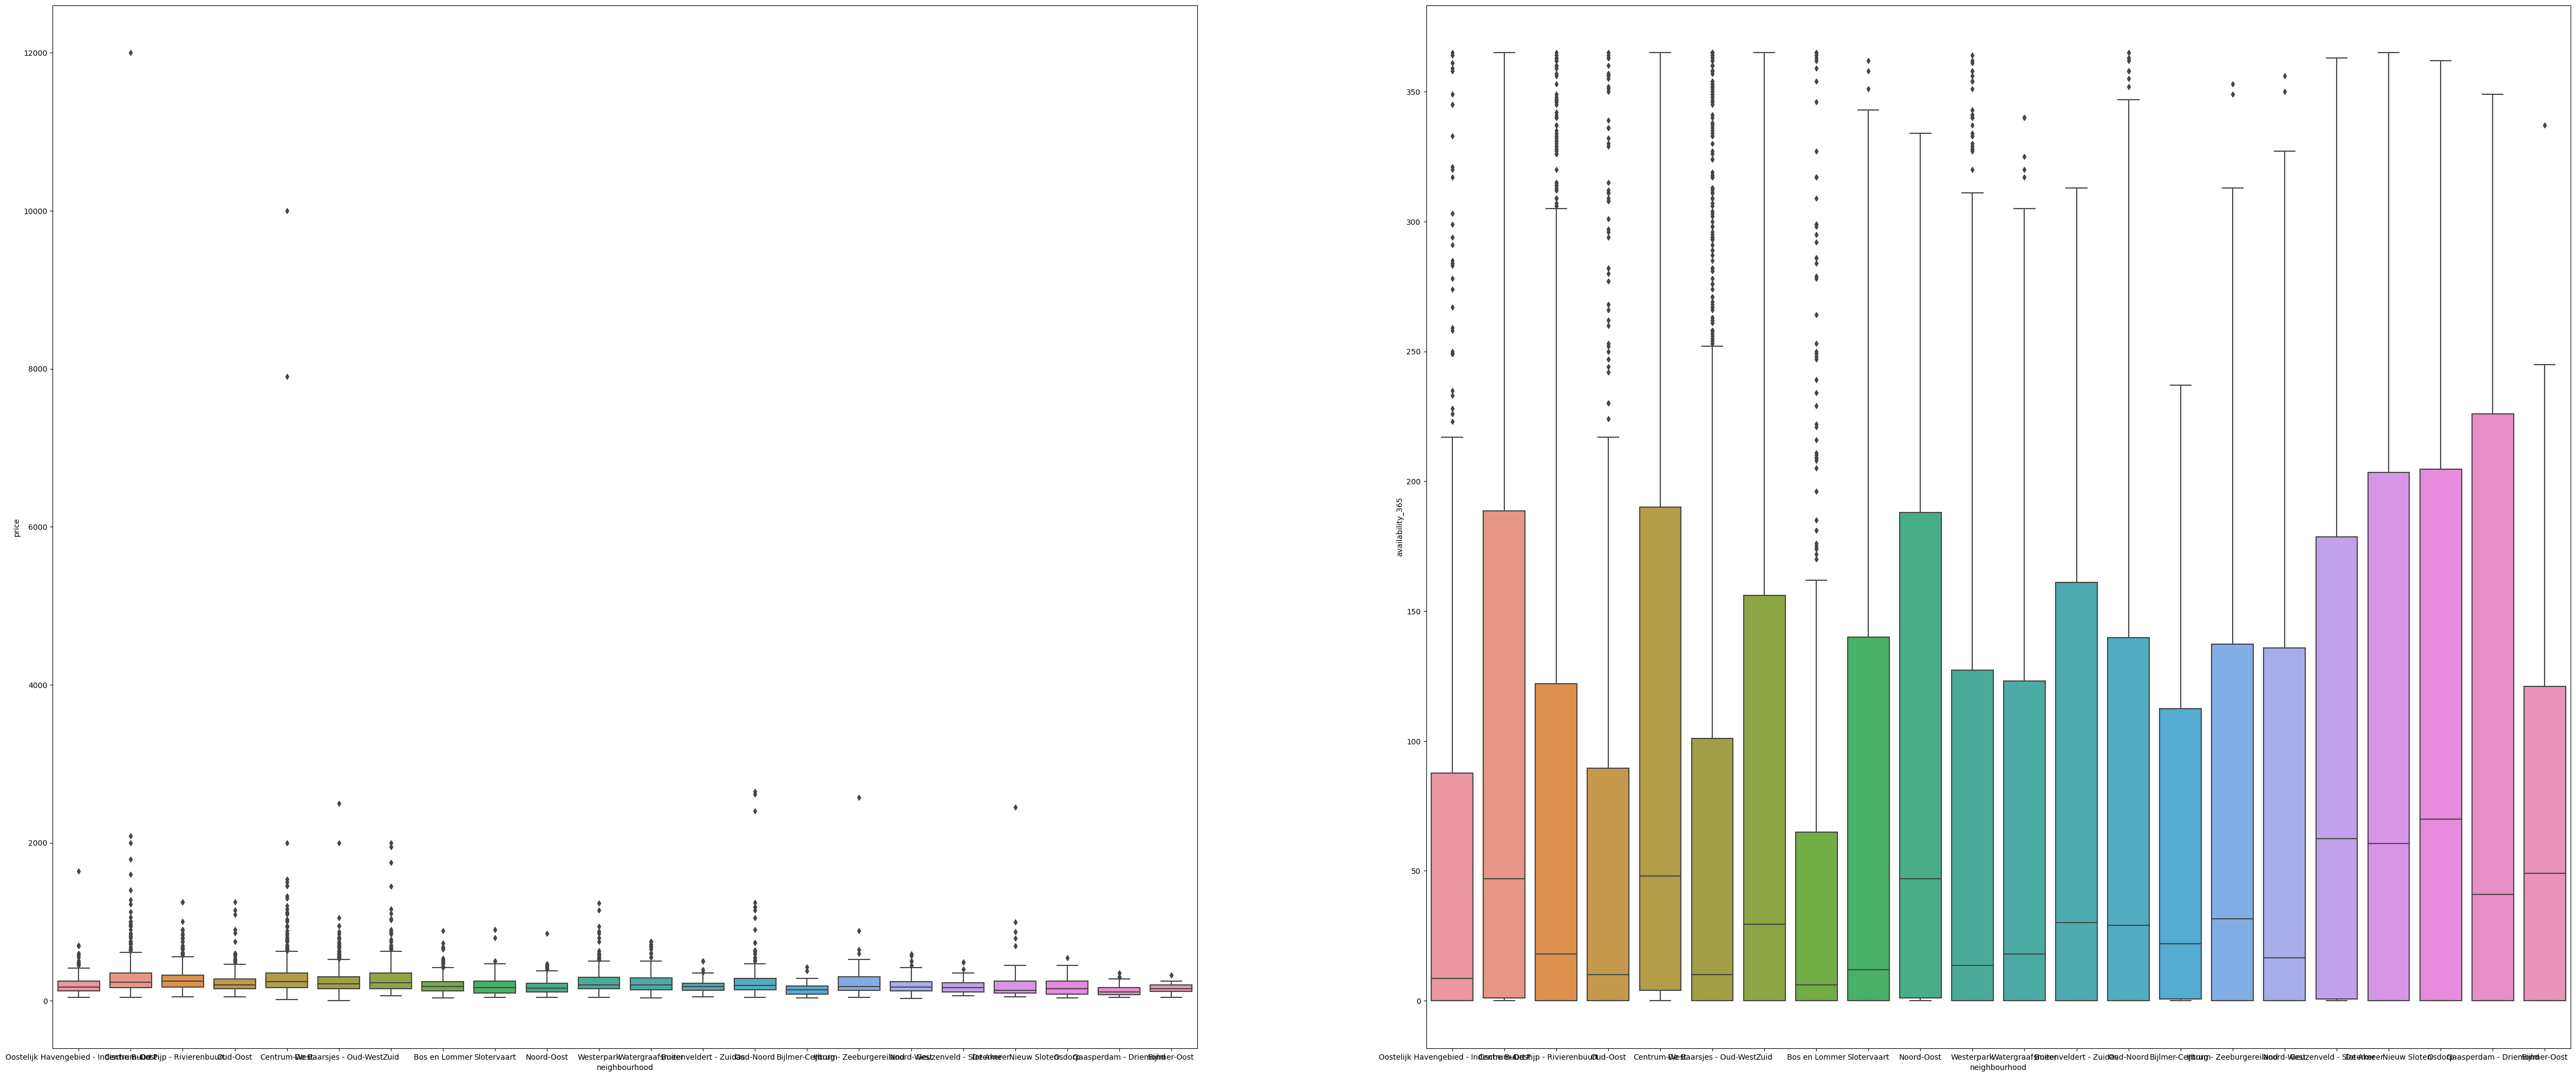

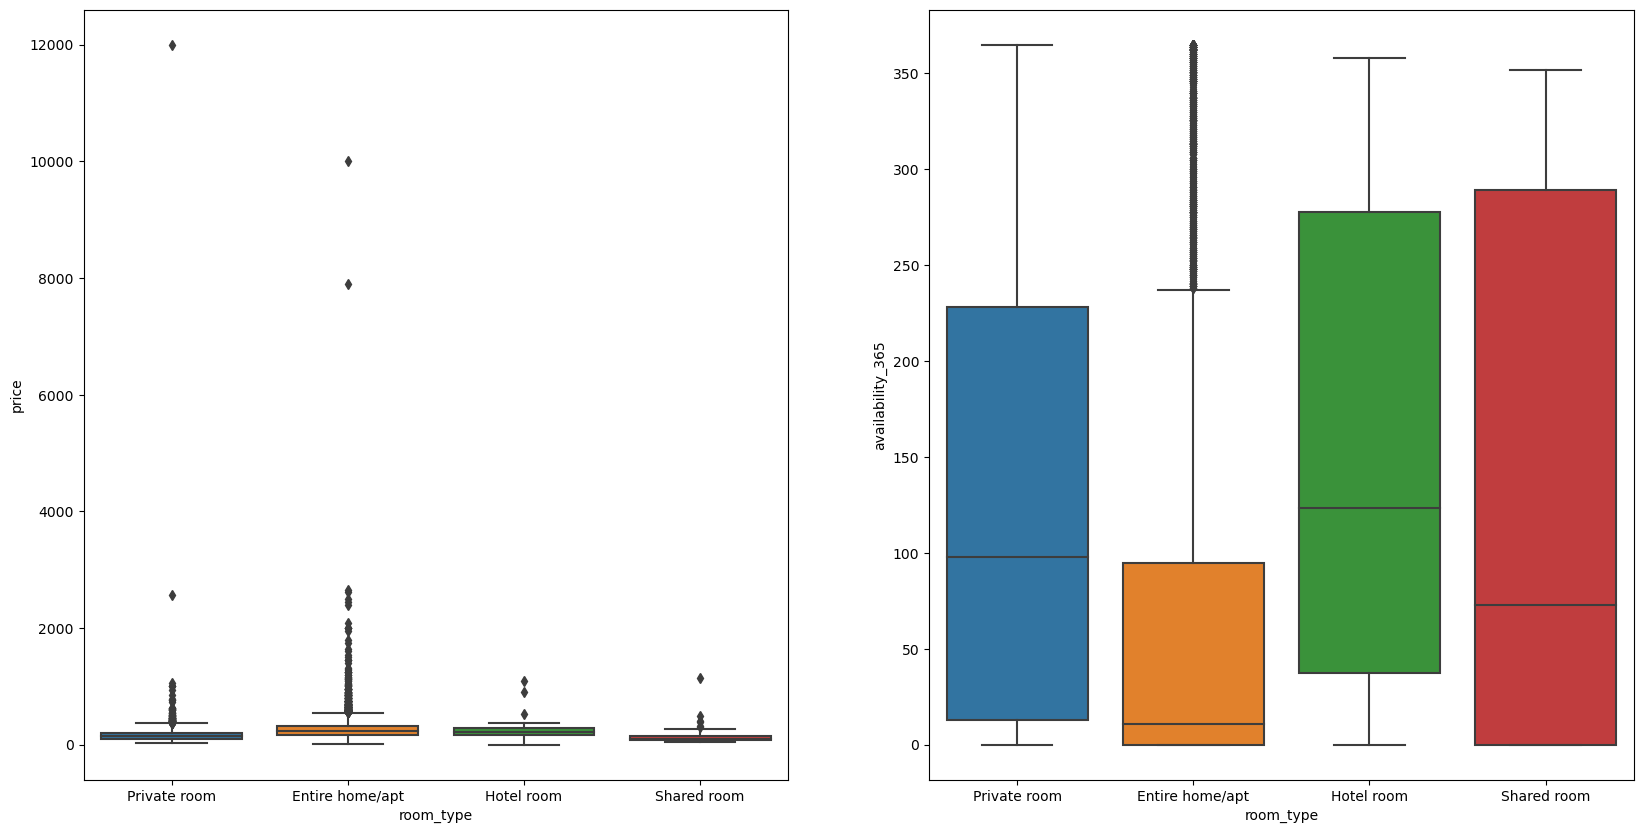

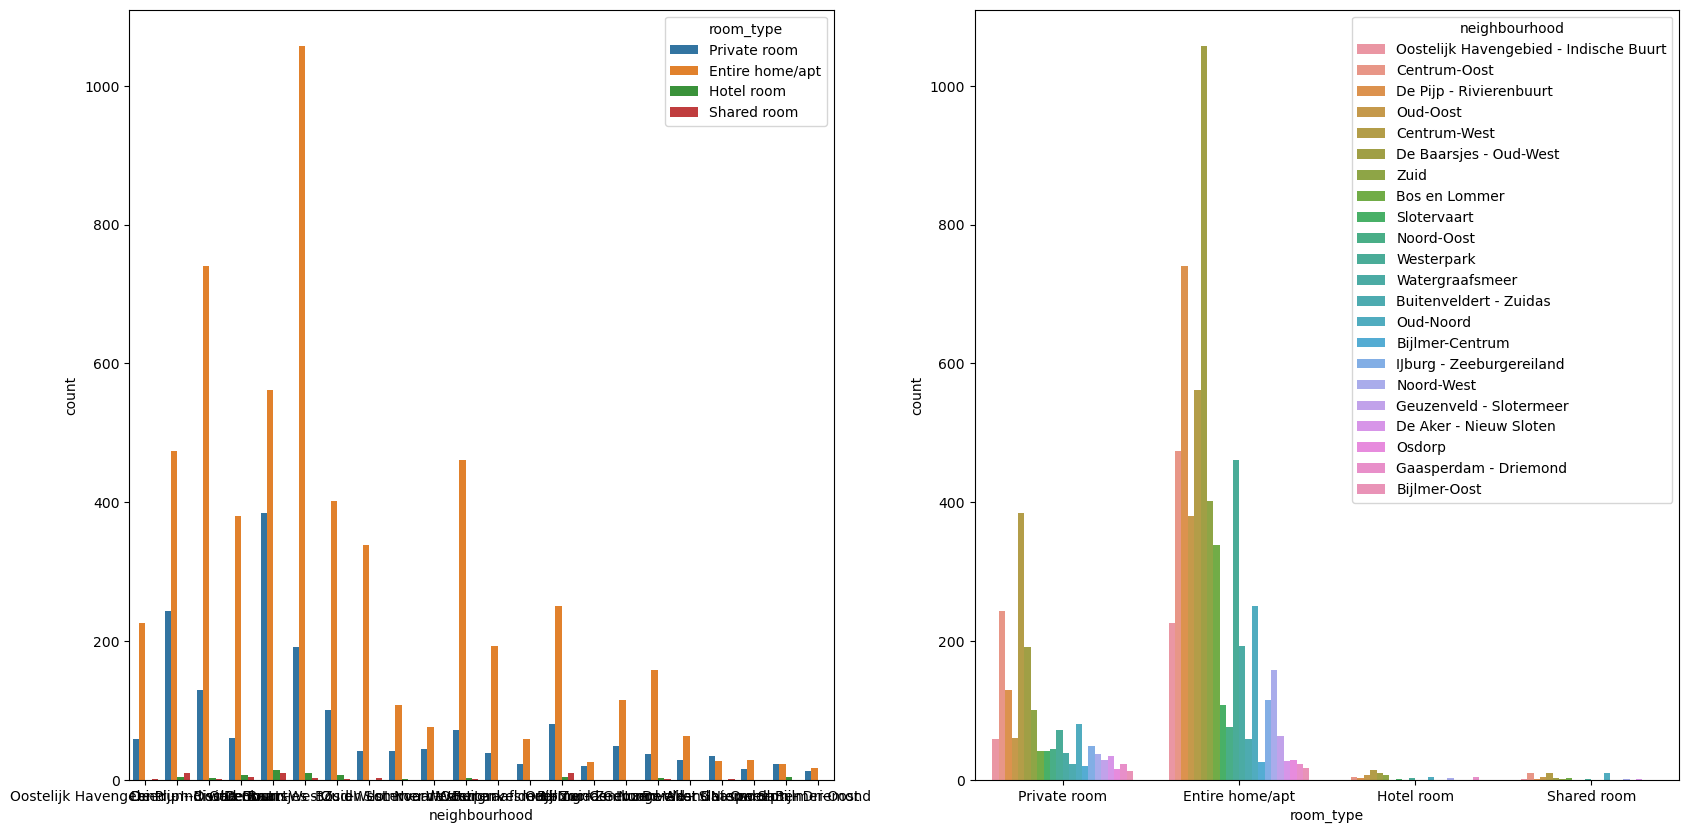

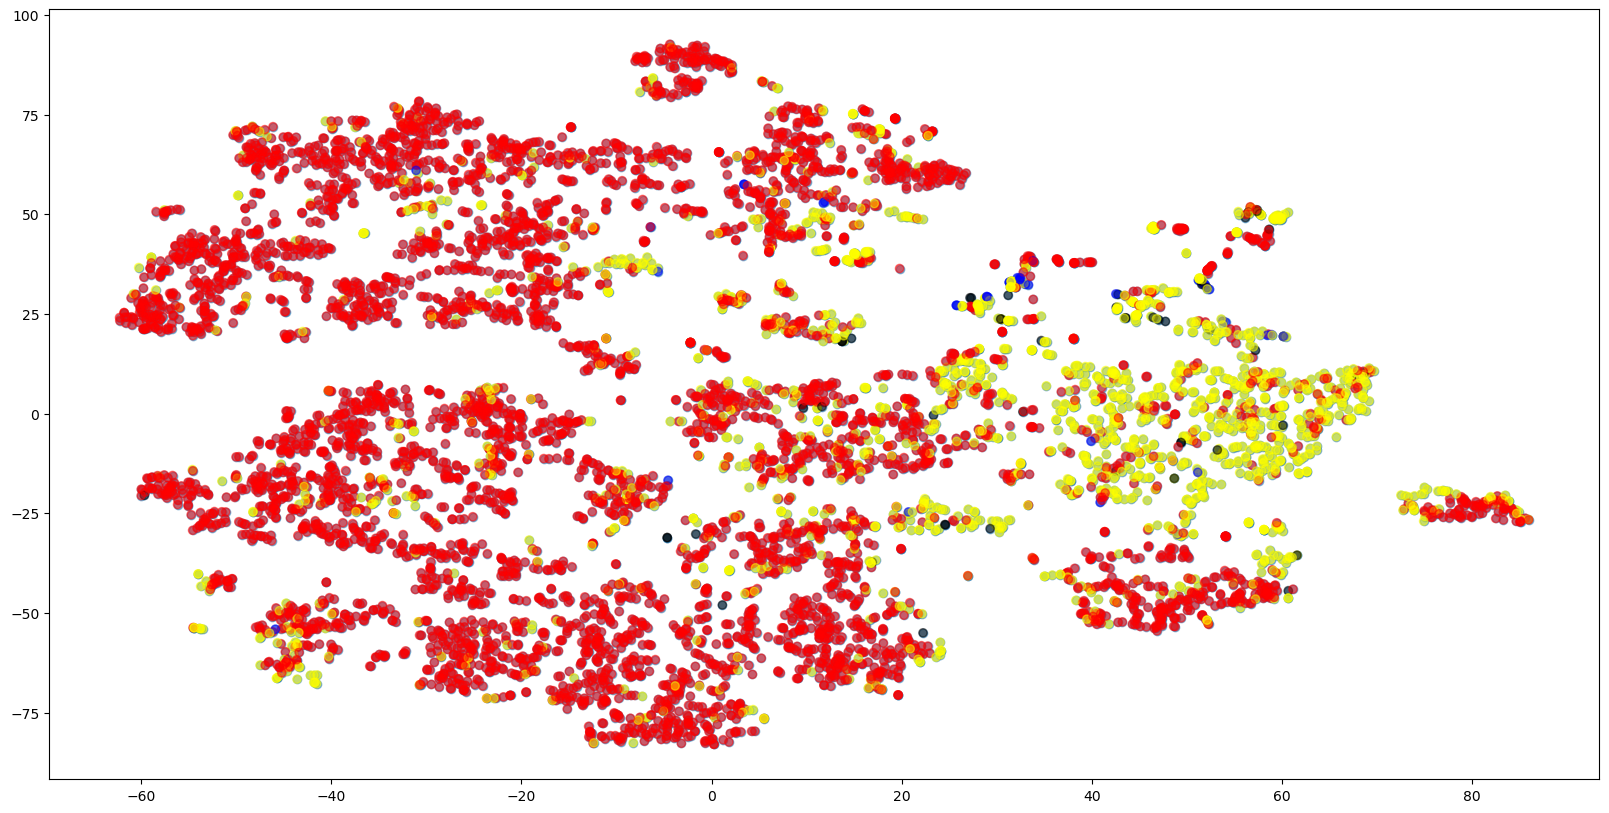

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('listings.csv')
#find the columns of file
x1=df.columns
print('The columns of file is\n' + str(x1) )
# statistical anaylsis of numerical features in data frame 
x2=df.describe()
print('statistical anaylsis of numerical features in data frame\n' + str(x2) )
# group by neighbourhood for price and availability_365
x3=df.groupby(['neighbourhood'])['availability_365'].agg([np.mean]).sort_values(by = 'mean')
x4=df.groupby(['neighbourhood'])['price'].agg([np.mean]).sort_values(by = 'mean')
print('group by neighbourhood for price\n' + str(x4) )
print('group by neighbourhood for availability_365\n' + str(x3) )
#show the two catagorical features together
x5=pd.crosstab(df['room_type'],df['neighbourhood'])
print('show the two catagorical features together\n' + str(x5) )
#remove duplicate rows
df=df.drop_duplicates()
# null values in each column
x5=df.isna().sum
#replace nullvalues in each column
df['last_review']=df['last_review'].fillna(0)
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
df['neighbourhood_group']=df['neighbourhood_group'].fillna(0)
#visualize important numerical features
features = ['price','availability_365']
df[features].hist(figsize=(10,5))
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(10,5))
sns.distplot(df['price'],ax = axes[0])
sns.distplot(df['availability_365'],ax = axes[1])
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(10,5))
sns.boxplot(y= df['price'],ax = axes[0])
sns.boxplot(y= df['availability_365'],ax = axes[1])
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(10,5))
sns.violinplot(y= df['price'],ax = axes[0])
sns.violinplot(y= df['availability_365'],ax = axes[1])
#visualize important catagorical features
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(60,20))
sns.countplot(x= df['neighbourhood'],ax = axes[0])
sns.countplot(x= df['room_type'],ax = axes[1])
#check corrolation of numerical  features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)
#visualize two numerical features
plt.scatter(df['price'],df['availability_365'])
#visualize numerical with catagorical features
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(60,25))
sns.boxplot(x= df['neighbourhood'],y=df['price'],ax = axes[0])
sns.boxplot(x= df['neighbourhood'],y=df['availability_365'],ax = axes[1])
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(20,10))
sns.boxplot(x= df['room_type'],y=df['price'],ax = axes[0])
sns.boxplot(x= df['room_type'],y=df['availability_365'],ax = axes[1])
#visualize two catagorical features
_, axes = plt.subplots(nrows = 1 ,ncols= 2 ,figsize =(20,10))
sns.countplot(x= 'neighbourhood',hue ='room_type',data = df,ax = axes[0])
sns.countplot(x= 'room_type',hue ='neighbourhood',data = df,ax = axes[1])
#drop columns that have null values or catagorical features before dimensionality reduction
#visualization the result 
x = df.drop(['neighbourhood','room_type','host_name','name','last_review','license'],axis = 1)
X_scl = StandardScaler().fit_transform(x)
tsne = TSNE()
X_red = tsne.fit_transform(X_scl)
X_red.shape
_, axes = plt.subplots(nrows = 1 ,ncols= 1 ,figsize =(20,10))
plt.scatter(X_red[:,0],X_red[:,1],alpha=0.5)
plt.scatter(X_red[:,0],X_red[:,1],c = df['room_type'].map({'Entire home/apt' : 'red','Hotel room' : 'black','Private room': 'yellow','Shared room': 'blue'}),alpha = 0.5)